In [65]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/measurements.csv')

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 146.0 KB


In [8]:
df['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [9]:
df['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [67]:
df['refill liters'].fillna(0, inplace = True)

In [12]:
df['refill gas'].replace('E10', True, inplace = True)
df['refill gas'].replace('SP98', True, inplace = True)

In [15]:
df['refill gas'].fillna(False, inplace= True)

In [16]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  388 non-null    object
 11  refill gas     388 non-null    bool  
dtypes: bool(1), int64(5), object(6)
memory usage: 133.9 KB


In [17]:
df.temp_inside.unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [28]:
df.temp_inside[df.temp_inside.isna()]

93     NaN
95     NaN
97     NaN
98     NaN
99     NaN
100    NaN
102    NaN
201    NaN
203    NaN
261    NaN
267    NaN
268    NaN
Name: temp_inside, dtype: object

In [29]:
df.loc[[93 ,    
95    , 
97    , 
98    , 
99     ,
100    ,
102    ,
201    ,
203    ,
261    ,
267    ,
268    ]]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
93,"12,4","4,7",43,NaN,10,NaN,SP98,0,0,0,0,False
95,"11,8","5,3",52,NaN,11,NaN,SP98,0,0,0,0,False
97,"15,7","5,3",33,NaN,9,NaN,SP98,0,0,0,0,False
98,"12,9","5,7",35,NaN,9,NaN,SP98,0,0,0,0,False
99,"6,4","4,4",37,NaN,10,NaN,SP98,0,0,0,0,False
100,"5,3","4,1",34,NaN,9,NaN,SP98,0,0,0,0,False
102,"18,8",5,62,NaN,9,rain,SP98,0,1,0,0,False
201,"22,2","3,8",42,NaN,15,NaN,SP98,0,0,0,0,False
203,"12,6","4,1",33,NaN,17,NaN,SP98,0,0,0,0,False
261,"24,5","3,9",50,NaN,15,sun,E10,0,0,1,0,False


In [44]:
dr = df.loc[~df.index.isin([93, 95, 97, 98, 99, 100, 102, 201, 203, 261, 267, 268])]

In [45]:
dr.temp_inside = dr.temp_inside.str.replace(',', '.')

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_5252/2507947096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.temp_inside = dr.temp_inside.str.replace(',', '.')


In [46]:
dr['temp_inside'] = dr['temp_inside'].astype('float64')

/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_5252/1440085469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['temp_inside'] = dr['temp_inside'].astype('float64')


In [47]:
dr.temp_inside.describe()

count    376.000000
mean      21.929521
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [48]:
df.temp_inside = df.temp_inside.str.replace(',', '.')

In [49]:
df['temp_inside'] = df['temp_inside'].astype('float64')

In [52]:
df.temp_inside.fillna(df.temp_inside.median(),inplace = True)

In [54]:
'''

Since the values from the special column are represented in the columns AC, rain and sun
i will drop the column

'''

'\nSince the values from the special column are represented in the columns AC, rain and sun\ni will drop the column'

In [55]:
df.drop(columns='specials', inplace = True)

In [56]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    object 
 1   consume        388 non-null    object 
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    object 
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   refill liters  388 non-null    object 
 10  refill gas     388 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 99.7 KB


In [58]:
df.distance = df.distance.str.replace(',', '.')
df['distance'] = df['distance'].astype('float64')

In [59]:
df.consume = df.consume.str.replace(',', '.')
df['consume'] = df['consume'].astype('float64')

In [62]:
df['refill liters'] = df['refill liters'].str.replace(',', '.')
df['refill liters'] = df['refill liters'].astype('float64')

In [68]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    object 
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   refill liters  388 non-null    float64
 10  refill gas     388 non-null    bool   
dtypes: bool(1), float64(4), int64(5), object(1)
memory usage: 50.7 KB


/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_5252/1144898090.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df.corr(), dtype=bool))
/var/folders/04/59t4vh2x34534rlkgcmfybl40000gn/T/ipykernel_5252/1144898090.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


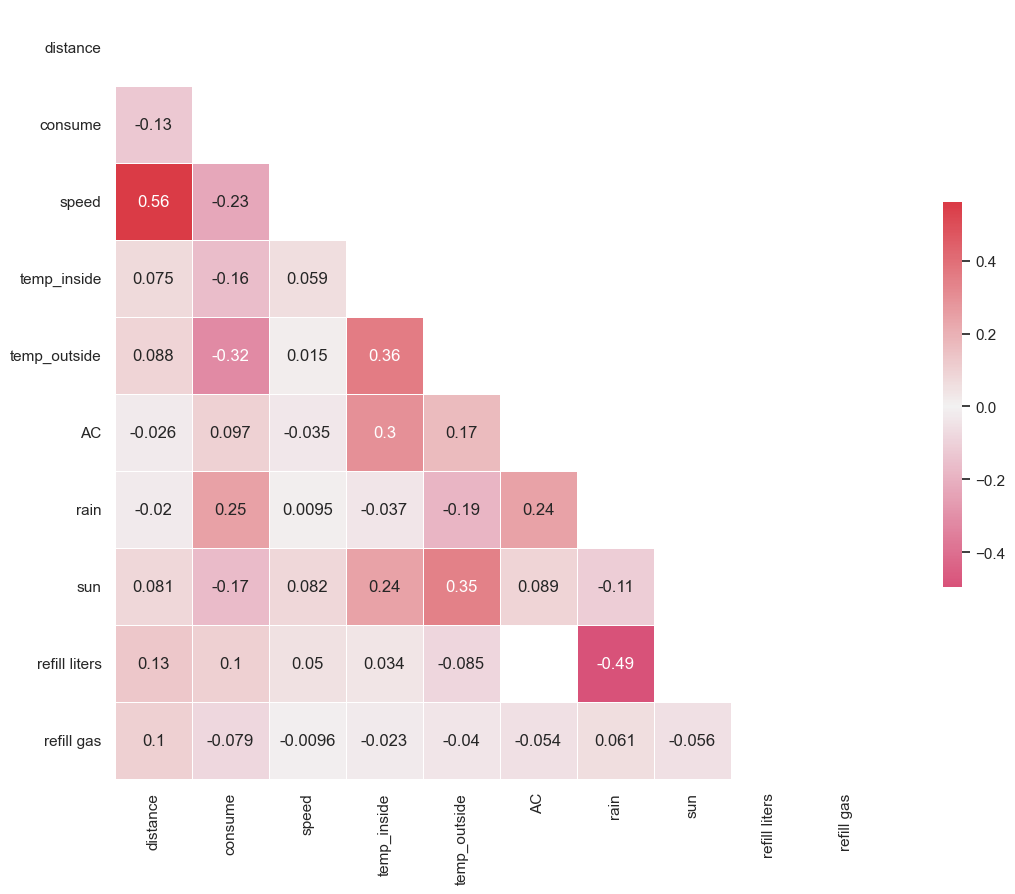

In [66]:
plt.figure(figsize=(15, 10))
sns.set(style='white')
mask=np.triu(np.ones_like(df.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [79]:
pivot = pd.pivot_table(data= df , columns = 'gas_type', aggfunc = 'mean')
pivot

gas_type,E10,SP98
AC,0.04375,0.100877
consume,4.93125,4.899123
distance,21.09625,18.639912
rain,0.10000,0.140351
refill gas,0.03125,0.035088
refill liters,1.23750,1.247807
speed,43.50625,40.820175
sun,0.07500,0.087719
temp_inside,21.91875,21.940789
temp_outside,10.11875,12.228070


<Axes: >

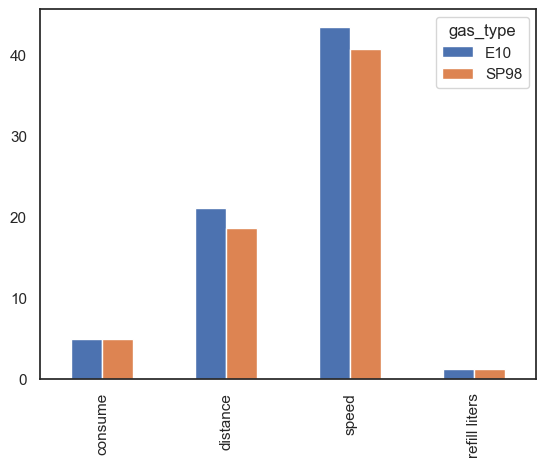

In [81]:
pivot.loc[['consume','distance','speed','refill liters']].plot(kind='bar')

In [82]:
sp_price = 1.76
e10_price = 1.89

## Given the insights we found, E10 has bigger distances at higher speeds while maintaing refills and consume the same as SP98, therefore E10 is the better Gas Type.